In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv', index_col=[0])

In [3]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
df.tail()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0
862,15,27,1,70.0,0,0,14,31,19,12,3,1,0,0


In [5]:
df.shape

(863, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


In [7]:
one = OneHotEncoder(sparse=False)

In [8]:
loc=pd.DataFrame(one.fit_transform(df[['location']]))
con=pd.DataFrame(one.fit_transform(df[['country']]))
gen=pd.DataFrame(one.fit_transform(df[['gender']]))
s1=pd.DataFrame(one.fit_transform(df[['symptom1']]))
s2=pd.DataFrame(one.fit_transform(df[['symptom2']]))
s3=pd.DataFrame(one.fit_transform(df[['symptom3']]))
s4=pd.DataFrame(one.fit_transform(df[['symptom4']]))
s5=pd.DataFrame(one.fit_transform(df[['symptom5']]))
new_df = pd.concat ([loc,con,gen,s1,s2,s3,s4,s5], axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,7,8,9,10,11,12,0,1,2,3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
new_df= pd.concat((new_df,df['age'],df['vis_wuhan'],df['from_wuhan'],df['symptom6'],df['diff_sym_hos'],df['result']),axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,age,vis_wuhan,from_wuhan,symptom6,diff_sym_hos,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,66.0,1,0,1,8,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,56.0,0,1,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,46.0,0,1,1,13,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,60.0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,58.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,24.0,0,0,1,0,1
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,35.0,0,0,1,0,0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,49.4,0,0,1,0,0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,49.4,0,0,1,0,0


In [10]:
new_df= new_df.drop(columns=['symptom6'], axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,12,0,1,2,3,age,vis_wuhan,from_wuhan,diff_sym_hos,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,66.0,1,0,8,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,56.0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,46.0,0,1,13,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,60.0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,58.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,24.0,0,0,0,1
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,35.0,0,0,0,0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,49.4,0,0,0,0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,49.4,0,0,0,0


In [11]:
new_df.isnull().sum()

0               0
1               0
2               0
3               0
4               0
               ..
age             0
vis_wuhan       0
from_wuhan      0
diff_sym_hos    0
result          0
Length: 275, dtype: int64

In [12]:
X = new_df.drop(columns=['result'])
y = new_df['result']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
options_paramters= [
{'penalty' : ['l1', 'l2'],
'C' : np.logspace(-4, 4, 20),
'solver' : ['lbfgs', 'newton-cg', 'liblinear'],
}
]
classifier = GridSearchCV(LogisticRegression(), param_grid = options_paramters, cv = 5, verbose=True, n_jobs=-1)
best_clf = classifier.fit(X_train,y_train)
best_clf.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


LogisticRegression(C=29.763514416313132, solver='newton-cg')

In [15]:
logreg = LogisticRegression(C=29.763514416313132, solver='newton-cg')
scores = cross_val_score(logreg, X_train, y_train , cv = 5, scoring= 'accuracy')
y_train_predict = cross_val_predict(logreg, X_train, y_train , cv = 5)
y_train_score= cross_val_predict(logreg, X_train, y_train , cv = 5, method="decision_function")
precesion=precision_score(y_train ,y_train_predict)
recall=recall_score(y_train ,y_train_predict)
F1=f1_score(y_train ,y_train_predict)
auc=roc_auc_score(y_train,y_train_score)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_train, y_train_score)
print(scores.mean())
print(precesion)
print(recall)
print(F1)
print(auc)




0.972463768115942
0.9178082191780822
0.8375
0.8758169934640524
0.9716188524590164


In [16]:
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
y_test_score=logreg.decision_function(X_test)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[144,   1],
       [  5,  23]], dtype=int64)

##### You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 144 and 23 are correct predictions, and 1 and 5 are incorrect predictions

Text(0.5, 257.44, 'Predicted label')

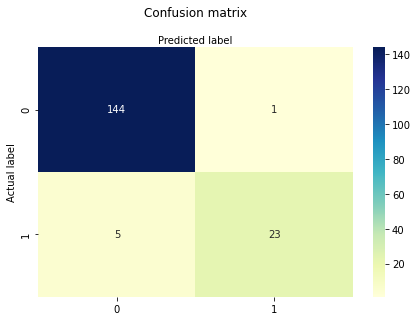

In [17]:
%matplotlib inline
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("auc:",roc_auc_score(y_test, y_test_score))
print("f1:",f1_score(y_test, y_pred))

Accuracy: 0.9653179190751445
Precision: 0.9583333333333334
Recall: 0.8214285714285714
auc: 0.9913793103448275
f1: 0.8846153846153847


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       145
           1       0.96      0.82      0.88        28

    accuracy                           0.97       173
   macro avg       0.96      0.91      0.93       173
weighted avg       0.97      0.97      0.96       173



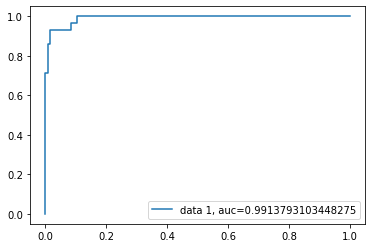

In [20]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()